In [1]:
import sys
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axis
from matplotlib.patches import Ellipse
import scipy
import numpy as np
from numpy import *
import math
import pylab
import random
from pylab import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as P
from astropy.io import ascii
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.style.use('ggplot')

sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

### How we read in the data

In [2]:
dat4=ascii.read("Leo4_lisp_rod_sdss_ppmxl",data_start=2)
dat5=ascii.read("Leo5_lisp_rod_sdss_ppmxl",data_start=2)
datB=ascii.read("LeoB_lisp_rod_sdss_ppmxl",data_start=2)

### How we define variables

In [3]:
vhc4 = dat4['Vhel']
verr4 = dat4['Verr']
Radeg4=dat4['RA']
Decdeg4=dat4['DEC']

vhc5 = dat5['Vhel']
verr5 = dat5['Verr']
Radeg5=dat5['RA']
Decdeg5=dat5['DEC']

vhcB = datB['Vhel']
verrB = datB['Verr']
RadegB=datB['RA']
DecdegB=datB['DEC']

### How we explore

In [4]:
np.max(vhc4)

282.75069999999999

In [5]:
np.mean(vhc4)

89.990328143712574

### Where are we pointed to the sky

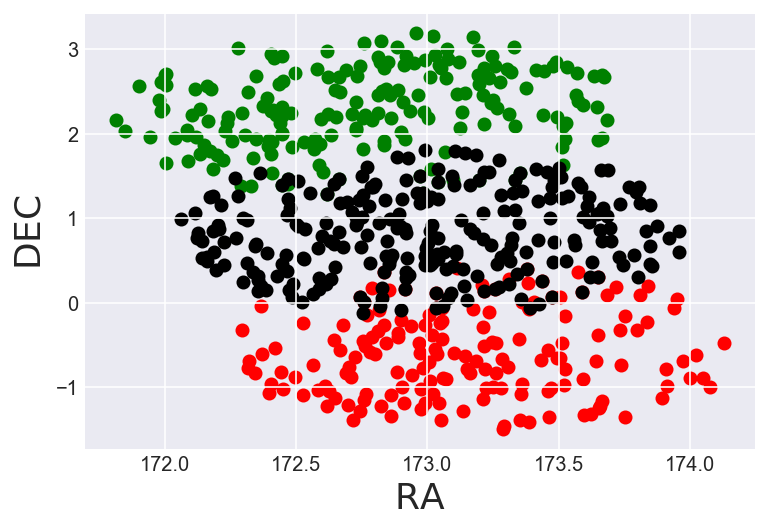

In [6]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,Decdeg4,'or',label='Leo4',zorder=-1)
ax.plot(Radeg5,Decdeg5,'og',label='Leo5',zorder=-1)
ax.plot(RadegB,DecdegB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

### How about velocity space

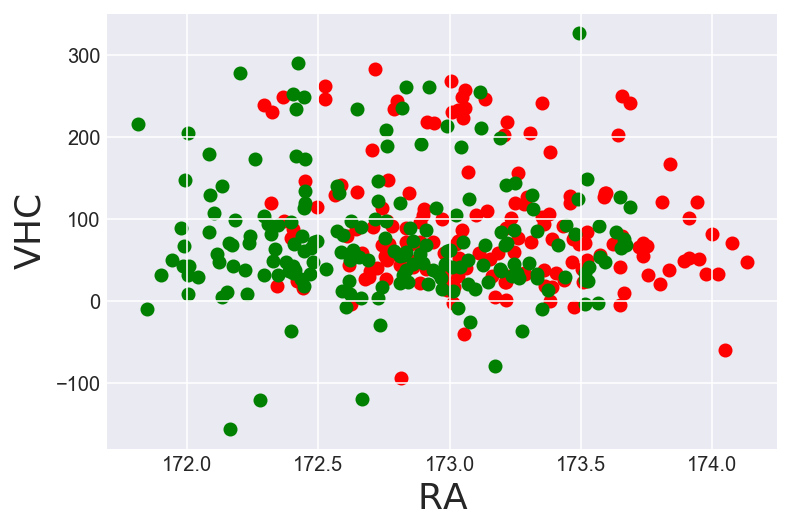

In [7]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,vhc4,'or',label='Leo4',zorder=-1)
ax.plot(Radeg5,vhc5,'og',label='Leo5',zorder=-1)
#ax.plot(RadegB,vhcB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

### This group looks velocities that are above 200 VHC are their own group

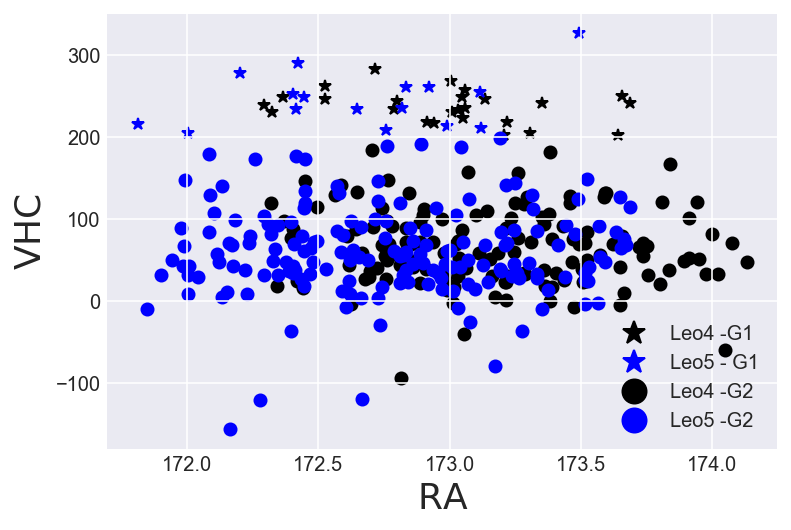

In [8]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4[vhc4 >= 200.0],vhc4[vhc4 >= 200.0],'*k',label='Leo4 -G1',zorder=-1)
ax.plot(Radeg5[vhc5 >= 200.0],vhc5[vhc5 >= 200.0],'*b',label='Leo5 - G1',zorder=-1)
ax.plot(Radeg4[vhc4 < 200.0],vhc4[vhc4 < 200.0],'ok',label='Leo4 -G2',zorder=-1)
ax.plot(Radeg5[vhc5 < 200.0],vhc5[vhc5 < 200.0],'ob',label='Leo5 -G2',zorder=-1)

#ax.plot(RadegB,vhcB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
ax.legend(markerscale=(2), loc=4, numpoints=1)
plt.show()

### It looks like Leo 4 and Leo 5 divide up

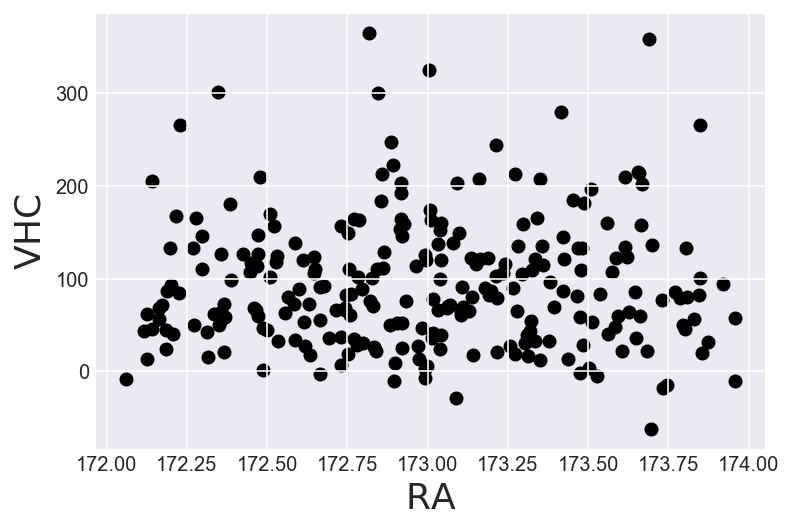

In [9]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
#ax.plot(Radeg4,vhc4,'or',label='Leo4',zorder=-1)
#ax.plot(Radeg5,vhc5,'og',label='Leo5',zorder=-1)
ax.plot(RadegB,vhcB,'ok',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

### Leo B does not seem to have more than one population

### Let's use some better visuals

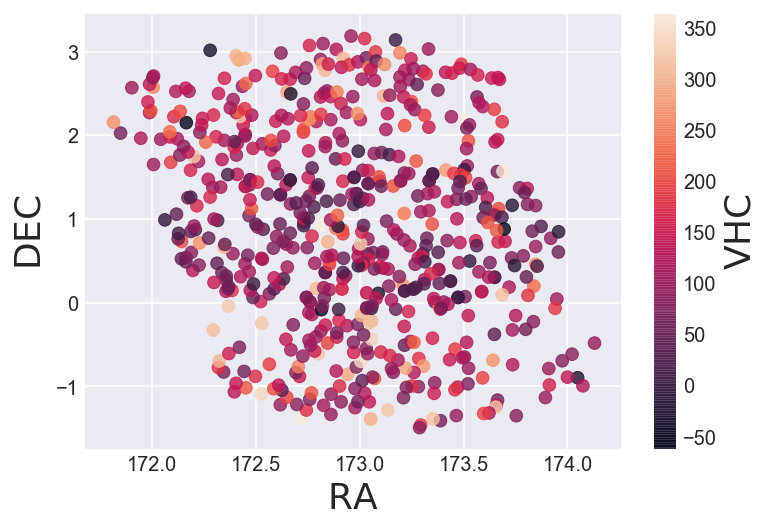

In [10]:
fig2=plt.figure(2)
ax=fig2.add_subplot(111)
plt.scatter(Radeg4,Decdeg4,marker='o',s=40,c=vhc4,label='Leo4', alpha=0.8)
plt.scatter(Radeg5,Decdeg5,marker='o',s=40,c=vhc5,label='Leo5', alpha=0.8)
plt.scatter(RadegB,DecdegB,marker='o',s=40,c=vhcB,label='LeoB', alpha=0.8)
cbar=plt.colorbar()
cbar.set_label(r'$\mathrm{VHC}$',fontsize=18)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
plt.show()

## We would like work with Pandas Dataframes

### We expect them to be easier to plot and easier to work with

In [11]:
df4=pd.DataFrame({}, dtype=float)
df4['Ra']=Radeg4
df4['Dec']=Decdeg4
df4['Vhc']=vhc4
df4['type']='4'

df5=pd.DataFrame({}, dtype=float)
df5['Ra']=Radeg5
df5['Dec']=Decdeg5
df5['Vhc']=vhc5
df5['type']='5'

dfb=pd.DataFrame({}, dtype=float)
dfb['Ra']=RadegB
dfb['Dec']=DecdegB
dfb['Vhc']=vhcB
dfb['type']='B'

df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,167.0,173.145054,0.435742,172.294416,172.813573,173.101125,173.461591,174.130467
Dec,167.0,-0.594130,0.489895,-1.491850,-0.994701,-0.638332,-0.222024,0.413713
Vhc,167.0,89.990328,75.357660,-95.036900,35.143500,70.703700,120.470550,282.750700


In [12]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,190.0,172.767223,0.479464,171.813191,172.404663,172.757018,173.131208,173.685525
Dec,190.0,2.291583,0.460383,1.289688,1.949530,2.272166,2.680670,3.184943
Vhc,190.0,74.992600,74.214644,-156.468900,31.477000,61.505100,102.387025,325.790900


In [13]:
dfb.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,254.0,172.992299,0.480875,172.060596,172.620685,172.993210,173.354469,173.957379
Dec,254.0,0.813037,0.477672,-0.117703,0.451313,0.780825,1.222173,1.809768
Vhc,254.0,94.555554,69.944432,-62.015300,44.958225,82.378900,132.538900,364.103700


### This is much easier than using numpy

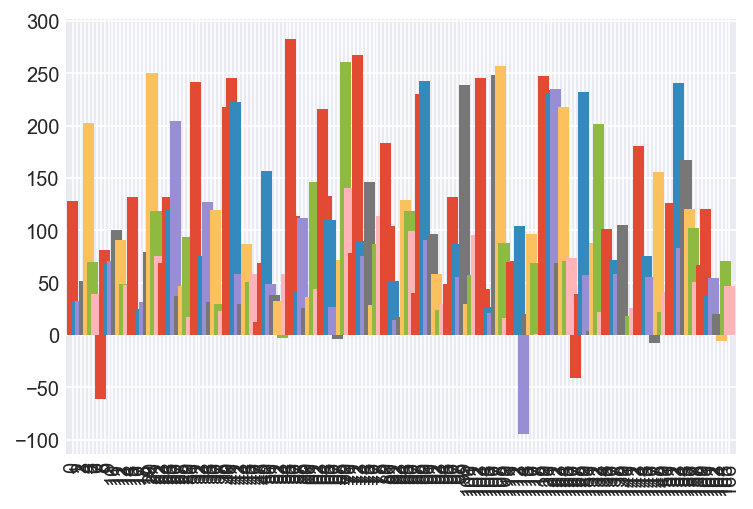

In [14]:
df4['Vhc'].plot(kind='bar', width=2.8)

### This could look better

#### Let's get our Pandas into order

### Use one big dataframe and look at everything

In [15]:
dfall=pd.concat([df4, df5, dfb], ignore_index=True)
dfall.describe().T
group=dfall.groupby(['type'])
group.mean()

,Ra,Dec,Vhc
type,,,
4,173.145054,-0.594130,89.990328
5,172.767223,2.291583,74.992600
B,172.992299,0.813037,94.555554


In [16]:
#if there are any null values it will cause us problems
dfall.isnull().sum()

Ra      0
Dec     0
Vhc     0
type    0
dtype: int64

#### We have no null values, our data is good

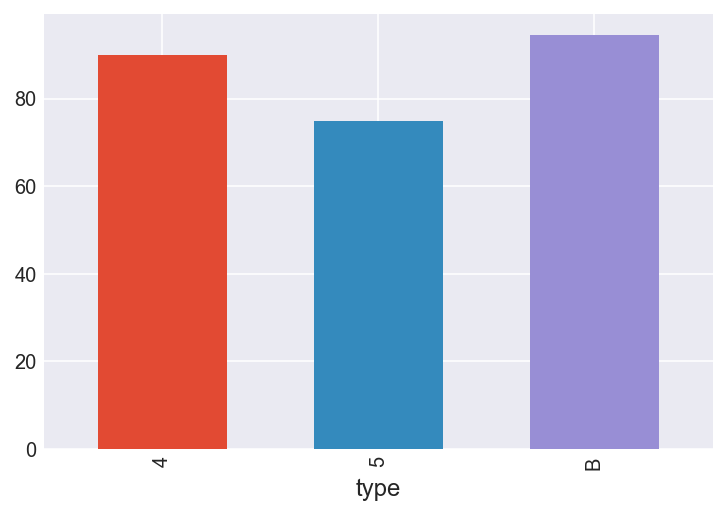

In [17]:
dfall.groupby(['type'])['Vhc'].mean().plot(kind='bar', width=0.6)

### This looks much better, it makes sense to group this way

### Let's start thinking about Machine Learning

#### Can we group by velocity to see different behaviour?

#### If the groups we saw (above 200 km/s in velocity) were real, we can look for them

### Let's try CLASSIFICATION

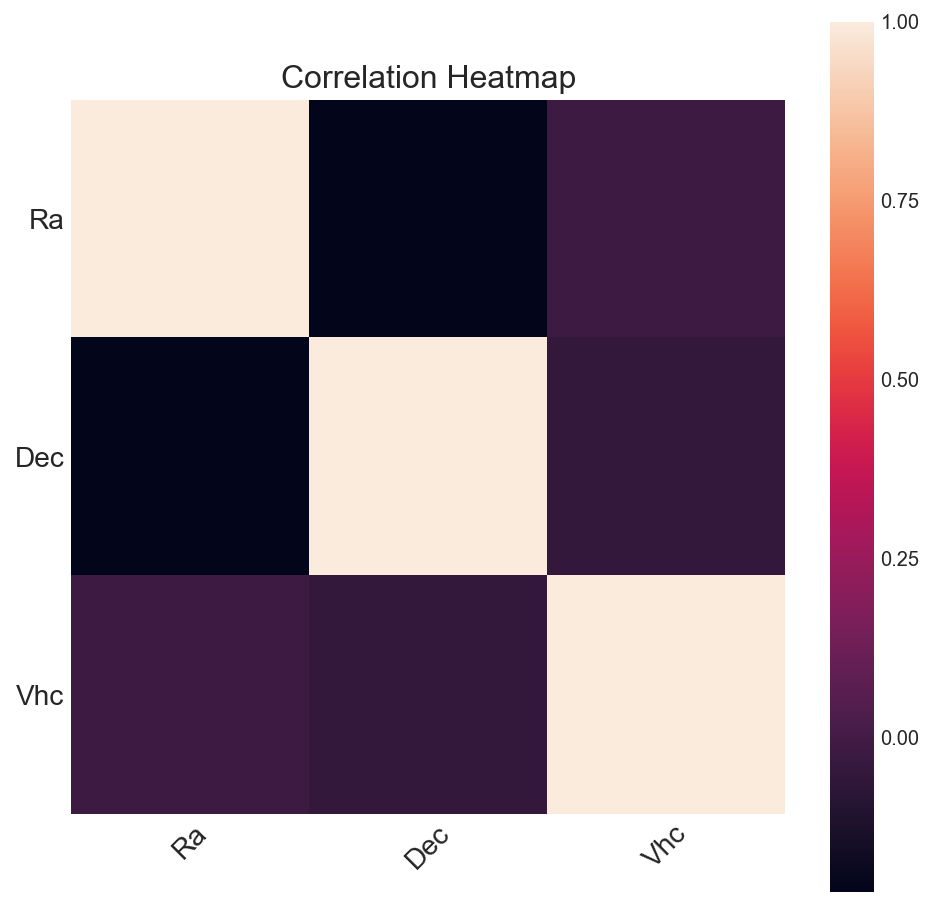

In [18]:
#dfall.corr
corr = dfall.corr()

f, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(data=corr, square=True, ax=ax)
plt.title('Correlation Heatmap',size=16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

### This looks good because it does not show a strong correlation

### We should select a possible target for the data, the algorithm asks for a true or false (1 or 0)

### Set up Machine Learning

In [20]:
dfall['Target']= np.where(dfall['Vhc']>=200, '1', '0') #1 is yes, 0 is no

In [21]:
dfall.head()

,Ra,Dec,Vhc,type,Target
0,173.458383,-0.554486,127.6215,4,0
1,174.022241,-0.614795,32.8969,4,0
2,173.974729,-0.693737,32.7209,4,0
3,173.910096,-0.786253,51.8847,4,0
4,173.641408,-0.687670,202.4992,4,1


In [22]:
dfall['Ra']=dfall['Ra'].astype(float)
dfall['Dec']=dfall['Dec'].astype(float)

In [23]:
X = dfall[[c for c in dfall.columns if not c in ['Target', 'type']]]
#X = dfall.V.values.astype(float)
Y = dfall.Target.values.astype(float)
X['Ra'][:3]

0    173.458383
1    174.022241
2    173.974729
Name: Ra, dtype: float64

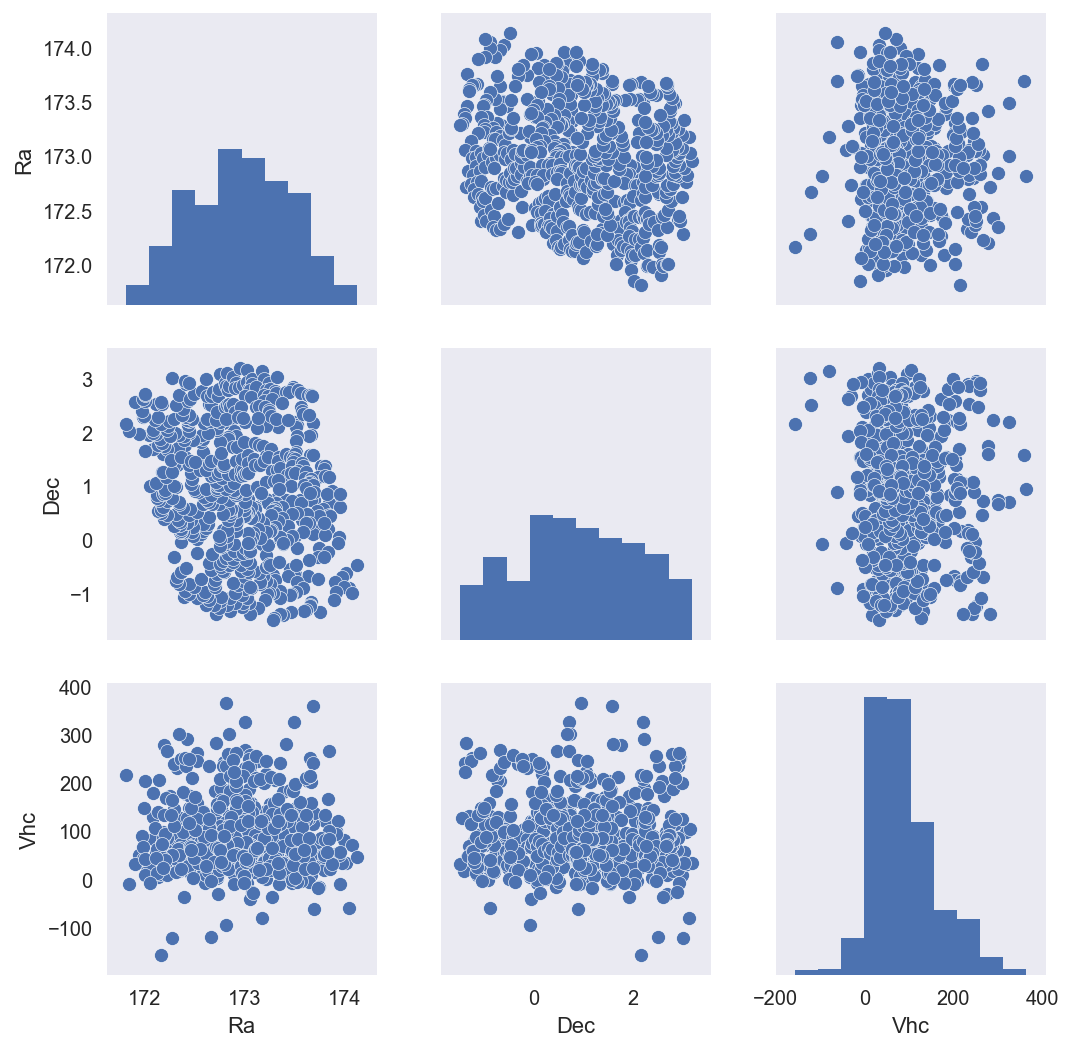

In [27]:
sns.set(style="ticks", color_codes=True)
sns.set_style("dark")
sns.pairplot(dfall[[c for c in dfall.columns if not c in ['Target','type']]])

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [29]:
scores = cross_val_score(knn, Xs, Y, cv=10)
print(scores)
print(np.mean(scores))

[ 0.96774194  1.          1.          0.98387097  0.93442623  0.98360656
  1.          0.93333333  0.98333333  0.9       ]
0.968631235678


In [30]:
k_values = range(1,50,2)
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs, Y, cv=10)
    accs.append(np.mean(scores))

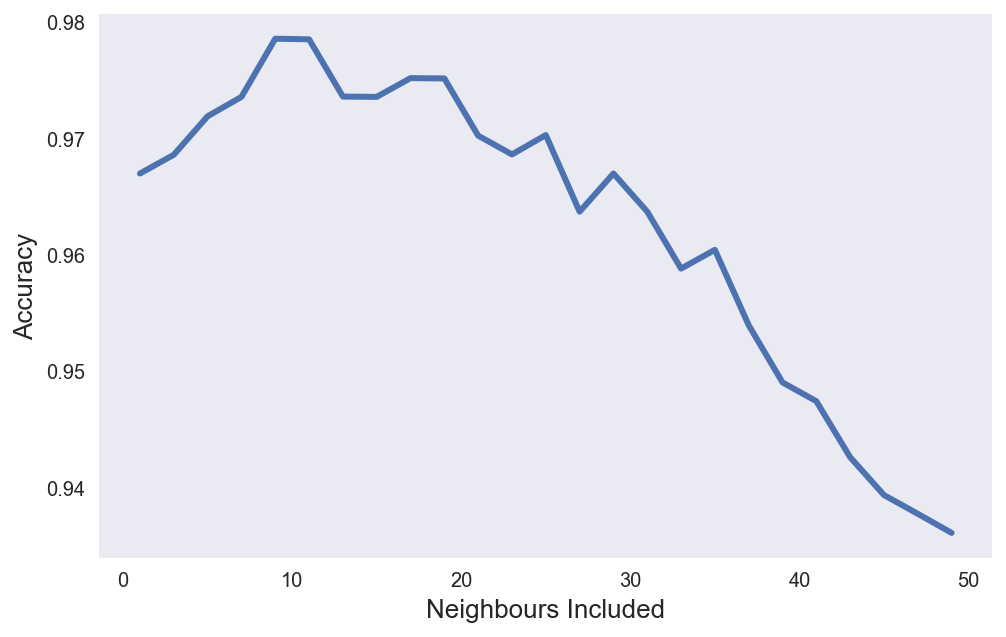

0.978603913273


In [42]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
#ax.set_xlabel(r'$\mathrm{Neighbours}$',fontsize=13)
#ax.set_ylabel(r'$\mathrm{Accuracy}$',fontsize=13)
plt.xlabel('Neighbours Included',fontsize=13)
plt.ylabel('Accuracy',fontsize=13)
plt.show()

print(np.max(accs))